In [1]:
#importing libraries
import requests
from bs4 import BeautifulSoup 
import re
import pandas as pd
import urllib

In [2]:
#Football site that has been scraped
base_url = 'http://www.skysports.com/football/news'

In [3]:
#Using request library to get the URL
skysports = requests.get(base_url)

In [4]:
#Check if the page has been scraped- we will get a response 200
skysports

<Response [200]>

In [5]:
#Text Content of the page
page = urllib.request.urlopen('http://www.skysports.com/football/news').read()

In [6]:
page

b'<!doctype html>\n<html lang="en" class="no-js">\n<head>\n\n    <meta charset="utf-8">\n    <title>Football News | Sky Sports</title>\n    <meta name="robots" content="NOODP,INDEX,FOLLOW" /> \n    <meta name="description" content="The best sports coverage from around the world, covering: Football, Cricket, Golf, Rugby, WWE, Boxing, Tennis and much more."/>\n    <meta name="keywords" content="News,Football,Sky,Sports,Sky Sports,sport,news"/>\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\n        <link rel="dns-prefetch" href="//e0.365dm.com">\n        <link rel="dns-prefetch" href="//e1.365dm.com">\n        <link rel="dns-prefetch" href="//e2.365dm.com">\n        <link rel="dns-prefetch" href="//fresh8.co">\n        <link rel="dns-prefetch" href="//annex.fresh8.co">\n        <link rel="dns-prefetch" href="//cdn-gs.fresh8.co">\n        <link rel="dns-prefetch" href="//player.ooyala.com">\n        <link rel="dns-prefetch" href="//static.chartbeat.com">\n        <l

In [7]:
#Creating soup using the library BeautifulSoup
soup = BeautifulSoup( page, 'html.parser')

In [8]:
#To see a structured form of soup
print (soup.prettify())

<!DOCTYPE doctype html>
<html class="no-js" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Football News | Sky Sports
  </title>
  <meta content="NOODP,INDEX,FOLLOW" name="robots">
   <meta content="The best sports coverage from around the world, covering: Football, Cricket, Golf, Rugby, WWE, Boxing, Tennis and much more." name="description"/>
   <meta content="News,Football,Sky,Sports,Sky Sports,sport,news" name="keywords"/>
   <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
   <link href="//e0.365dm.com" rel="dns-prefetch"/>
   <link href="//e1.365dm.com" rel="dns-prefetch"/>
   <link href="//e2.365dm.com" rel="dns-prefetch"/>
   <link href="//fresh8.co" rel="dns-prefetch"/>
   <link href="//annex.fresh8.co" rel="dns-prefetch"/>
   <link href="//cdn-gs.fresh8.co" rel="dns-prefetch"/>
   <link href="//player.ooyala.com" rel="dns-prefetch"/>
   <link href="//static.chartbeat.com" rel="dns-prefetch"/>
   <link href="//assets.adobedtm.com" rel="dns-prefetch"/>


In [9]:
#Getting the news headline for each page
news_headline = soup.select('h4.news-list__headline')

In [10]:
len(news_headline)

20

In [11]:
news_headline[0:5]

[<h4 class="news-list__headline">
 <a class="news-list__headline-link" href="http://www.skysports.com/football/news/11710/11390298/coventry-return-to-the-championship-possible-next-season-says-mark-robins">                Robins: Championship return possible            </a>
 </h4>, <h4 class="news-list__headline">
 <a class="news-list__headline-link" href="http://www.skysports.com/football/news/11668/11390272/former-chelsea-owner-ken-bates-criticised-for-reaction-to-alleged-racial-abuse">                Bates comments 'truly shameful'            </a>
 </h4>, <h4 class="news-list__headline">
 <a class="news-list__headline-link" href="http://www.skysports.com/football/news/11727/11390279/michael-dawson-to-leave-hull-and-return-to-nottingham-forest-on-two-year-deal">                Dawson to rejoin Forest            </a>
 </h4>, <h4 class="news-list__headline">
 <a class="news-list__headline-link" href="http://www.skysports.com/football/news/11678/11390255/newcastle-sign-goalkeeper-martin

In [12]:
news_headline = soup.select('h4.news-list__headline a')

In [13]:
len(news_headline)

20

In [14]:
news_headline[0]

<a class="news-list__headline-link" href="http://www.skysports.com/football/news/11710/11390298/coventry-return-to-the-championship-possible-next-season-says-mark-robins">                Robins: Championship return possible            </a>

In [15]:
news_headline[0].get_text()

'                Robins: Championship return possible            '

In [16]:
news_headline[1].get_text()

"                Bates comments 'truly shameful'            "

In [17]:
news_headline = soup.select('h4.news-list__headline > a:nth-of-type(1)')

In [18]:
news_headline[0].get_text()

'                Robins: Championship return possible            '

In [19]:
df = pd.DataFrame(columns=['news-list__headline'])
df.count()

news-list__headline    0
dtype: int64

In [20]:
#Automate the scraping process
def get_data_from_sky(url):
    print(url)
    skysports = requests.get(url)
    soup = BeautifulSoup(page,'html.parser')
    title_class = soup.select('h4.news-list__headline > a:nth-of-type(1)')
    print(len(news_headline))
    for i in range(len(news_headline)-1):
        df.loc[df.shape[0]] = [news_headline[i].get_text()]
    print('updated df with data')
    return news_headline[len(news_headline) - 1]

In [21]:
url = base_url
for i in range(0,6):
    more_url = get_data_from_sky(url)
    url = base_url+more_url['href']

http://www.skysports.com/football/news
20
updated df with data
http://www.skysports.com/football/newshttp://www.skysports.com/football/news/12016/11389879/adam-lallana-returns-for-england-despite-receiving-time-off
20
updated df with data
http://www.skysports.com/football/newshttp://www.skysports.com/football/news/12016/11389879/adam-lallana-returns-for-england-despite-receiving-time-off
20
updated df with data
http://www.skysports.com/football/newshttp://www.skysports.com/football/news/12016/11389879/adam-lallana-returns-for-england-despite-receiving-time-off
20
updated df with data
http://www.skysports.com/football/newshttp://www.skysports.com/football/news/12016/11389879/adam-lallana-returns-for-england-despite-receiving-time-off
20
updated df with data
http://www.skysports.com/football/newshttp://www.skysports.com/football/news/12016/11389879/adam-lallana-returns-for-england-despite-receiving-time-off
20
updated df with data


In [22]:
df.shape

(114, 1)

In [23]:
df.head()

,news-list__headline
0,Robins: Championship return po...
1,Bates comments 'truly shameful...
2,Dawson to rejoin Forest ...
3,Newcastle sign Dubravka perman...
4,Terry to leave Aston Villa ...


In [24]:
#Saving the headline in a csv file
df.to_csv('skysports.csv', encoding = 'utf8', index = False)

In [25]:
#Loading the data and importing libraries to visualize
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
%matplotlib inline

In [27]:
df = pd.read_csv('skysports.csv')

In [28]:
df.head()

,news-list__headline
0,Robins: Championship return po...
1,Bates comments 'truly shameful...
2,Dawson to rejoin Forest ...
3,Newcastle sign Dubravka perman...
4,Terry to leave Aston Villa ...


In [29]:
df[0:10]

,news-list__headline
0,Robins: Championship return po...
1,Bates comments 'truly shameful...
2,Dawson to rejoin Forest ...
3,Newcastle sign Dubravka perman...
4,Terry to leave Aston Villa ...
5,WATCH: Neymar jokes around at ...
6,Baxter rejoins Oldham
7,'Salah to return in three week...
8,Hamann questions Karius behavi...
9,Francis extends Bournemouth de...


In [33]:
#Creating WordCloud
import nltk
from wordcloud import WordCloud

In [34]:
#Tokenization
sentence = df['news-list__headline'][0]
sentence

'                Robins: Championship return possible            '

In [35]:
tokens = nltk.wordpunct_tokenize(sentence)
tokens

['Robins', ':', 'Championship', 'return', 'possible']

In [36]:
frequency_words = {}

In [37]:
#Generating Frequency words
for data in df['news-list__headline']:
    tokens = nltk.wordpunct_tokenize(data)
    for token in tokens:
        if token in frequency_words:
            count = frequency_words[token]
            count = count + 1
            frequency_words[token] = count
        else:
            frequency_words[token] = 1

In [66]:
#Frequency for each word occuring
frequency_words

{"'": 12,
 ',': 6,
 ':': 36,
 'Allegri': 6,
 'Allen': 6,
 'Arsenal': 6,
 'Arteta': 6,
 'Benitez': 6,
 'Big': 6,
 'Brighton': 6,
 'Bruce': 6,
 'Chesterfield': 6,
 'City': 18,
 'Davies': 6,
 'Donald': 6,
 'Eastleigh': 6,
 'England': 6,
 'Ham': 6,
 'Ipswich': 6,
 'Jorginho': 6,
 'Juve': 6,
 'LISTEN': 6,
 'La': 12,
 'Laughs': 6,
 'Liga': 12,
 'Mahrez': 6,
 'Man': 6,
 'Martin': 6,
 'McLeish': 6,
 'Moyes': 6,
 'Nagelsmann': 6,
 'PL': 6,
 'PSG': 6,
 'Priority': 6,
 'Regionals': 6,
 'Ross': 6,
 'Sheffield': 6,
 'Sidwell': 6,
 'Tuchel': 6,
 'Utd': 6,
 'WATCH': 6,
 'Weekly': 6,
 'West': 6,
 'Zaha': 6,
 'agrees': 6,
 'appoint': 6,
 'appointment': 6,
 'approach': 6,
 'at': 6,
 'charged': 6,
 'conduct': 6,
 'confirm': 6,
 'confirms': 6,
 'for': 6,
 'future': 6,
 'in': 6,
 'interest': 6,
 'is': 6,
 'keen': 6,
 'leave': 6,
 'list': 6,
 'meet': 6,
 'move': 6,
 'names': 6,
 'off': 6,
 'on': 12,
 'our': 6,
 'owners': 6,
 'paying': 6,
 'player': 6,
 'players': 6,
 'podcast': 6,
 'policy': 6,
 'radar': 6,

In [38]:
#Creating WordCloud
wordcloud = WordCloud()

In [39]:
wordcloud.generate_from_frequencies(frequency_words)

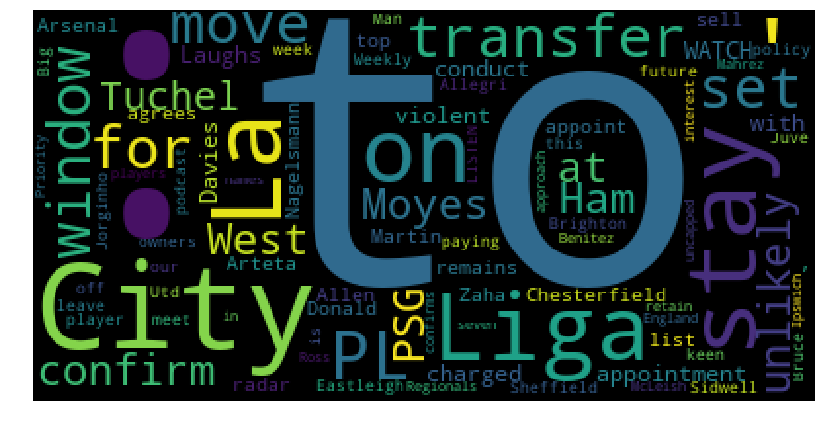

In [69]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [40]:
#Converting the dictionary to a DataFrame
freq = pd.DataFrame.from_dict(frequency_words, orient = 'index')

In [41]:
#Sorting the data in descensing order
freq.sort_values(by = 0, ascending=False).head(10)

,0
',48
:,24
deal,18
to,18
of,12
with,12
in,12
sign,12
for,12
at,12


In [42]:
#Importing libraries for StopWord Removal
from nltk.corpus import stopwords

In [43]:
stop = stopwords.words('english')

In [44]:
stop[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [45]:
#Creating frequency words (Remove all the stop words in our count and making every word in lower case)
frequency_words_wo_stop = {}
for data in df['news-list__headline']:
    tokens = nltk.wordpunct_tokenize(data)
    for token in tokens:
        if token.lower() not in stop:
            if token in frequency_words_wo_stop:
                count = frequency_words_wo_stop[token]
                count = count + 1
                frequency_words_wo_stop[token] = count
            else:
                frequency_words_wo_stop[token] = 1

In [46]:
wordcloud.generate_from_frequencies(frequency_words)

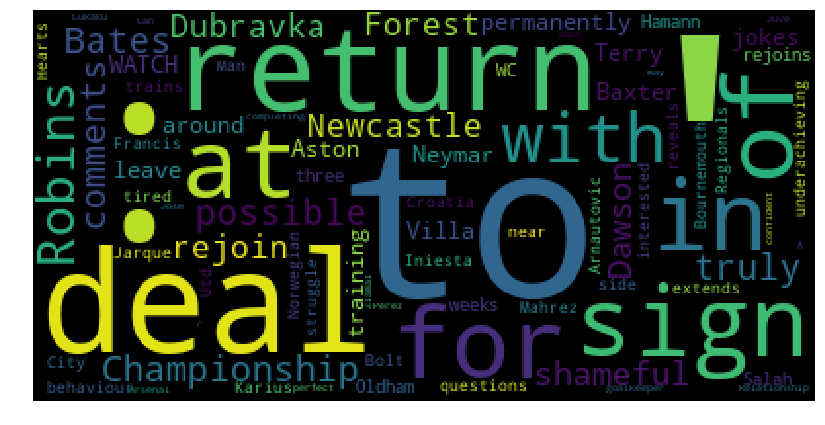

In [47]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [48]:
#Extending the stopword list with common punctuations 
stop.extend(('.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}','/','-'))

In [49]:
frequency_words = {}

In [50]:
def generate_word_frequency(row):
    data = row['news-list__headline']
    tokens = nltk.wordpunct_tokenize(data)
    token_list = []
    for token in tokens:
        if token.lower() not in stop:
            token_list.append(token.lower())
            if token.lower() in frequency_words:
                count = frequency_words[token.lower()]
                count = count + 1
                frequency_words[token.lower()] = count
            else:
                frequency_words[token.lower()] = 1
    
    return ','.join(token_list)

In [51]:
df['tokens'] = df.apply(generate_word_frequency,axis=1)

In [52]:
df.head()

,news-list__headline,tokens
0,Robins: Championship return po...,"robins,championship,return,possible"
1,Bates comments 'truly shameful...,"bates,comments,truly,shameful"
2,Dawson to rejoin Forest ...,"dawson,rejoin,forest"
3,Newcastle sign Dubravka perman...,"newcastle,sign,dubravka,permanently"
4,Terry to leave Aston Villa ...,"terry,leave,aston,villa"


In [53]:
wordcloud.generate_from_frequencies(frequency_words)

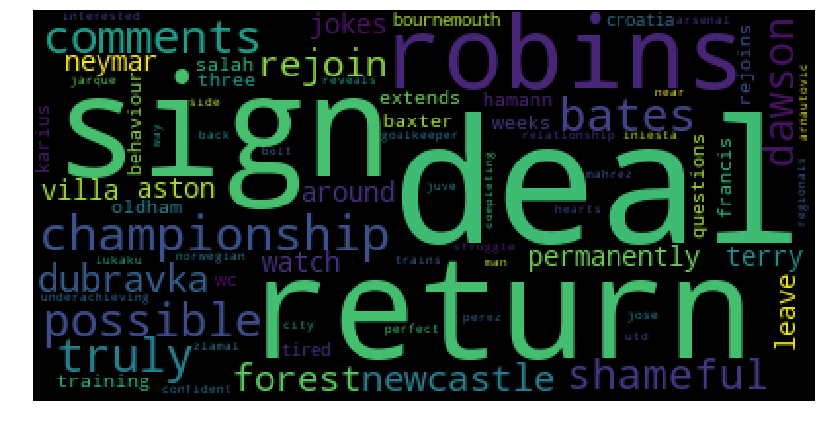

In [54]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [55]:
#Importing libraries for stemming
from nltk.stem.porter import PorterStemmer

In [56]:
porter_stemmer = PorterStemmer()

In [57]:
porter_stemmer.stem('dividing')

'divid'

In [58]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [59]:
#Importing libraries for Lemmatization 
from nltk.stem import WordNetLemmatizer

In [73]:
wordnet_lemmatizer = WordNetLemmatizer()

In [61]:
wordnet_lemmatizer.lemmatize('are')

'are'

In [62]:
wordnet_lemmatizer.lemmatize('is')

'is'

In [63]:
wordnet_lemmatizer.lemmatize('dividing', pos = "v")

'divide'

In [64]:
wordnet_lemmatizer.lemmatize('is',pos='v')

'be'

In [69]:
def stem_title(data):
    return porter_stemmer.stem(data['news-list__headline'])

In [75]:
def lemmatize_title(data):
    return wordnet_lemmatizer.lemmatize(data['news-list__headline'])

In [76]:
df['stem'] = df.apply(stem_title,axis=1)

In [77]:
df.head()

,news-list__headline,tokens,stem
0,Robins: Championship return po...,"robins,championship,return,possible",robins: championship return po...
1,Bates comments 'truly shameful...,"bates,comments,truly,shameful",bates comments 'truly shameful...
2,Dawson to rejoin Forest ...,"dawson,rejoin,forest",dawson to rejoin forest ...
3,Newcastle sign Dubravka perman...,"newcastle,sign,dubravka,permanently",newcastle sign dubravka perman...
4,Terry to leave Aston Villa ...,"terry,leave,aston,villa",terry to leave aston villa ...


In [78]:
df['lemma'] = df.apply(lemmatize_title, axis=1)

In [135]:
df.head()

,news-list__headline,tokens,stem,lemma
0,PL transfer window set for mov...,"pl,transfer,window,set,move",pl transfer window set for mov...,PL transfer window set for mov...
1,Moyes unlikely to stay at West...,"moyes,unlikely,stay,west,ham",moyes unlikely to stay at west...,Moyes unlikely to stay at West...
2,PSG confirm Tuchel appointment...,"psg,confirm,tuchel,appointment",psg confirm tuchel appointment...,PSG confirm Tuchel appointment...
3,Davies charged with violent co...,"davies,charged,violent,conduct",davies charged with violent co...,Davies charged with violent co...
4,WATCH: La Liga Laughs,"watch,la,liga,laughs",watch: la liga laughs,WATCH: La Liga Laughs


In [79]:
df.tail()

,news-list__headline,tokens,stem,lemma
109,Iniesta reveals Jarque struggl...,"iniesta,reveals,jarque,struggle",iniesta reveals jarque struggl...,Iniesta reveals Jarque struggl...
110,Hearts sign goalkeeper Zlamal ...,"hearts,sign,goalkeeper,zlamal",hearts sign goalkeeper zlamal ...,Hearts sign goalkeeper Zlamal ...
111,Lukaku: Relationship with Jose...,"lukaku,relationship,jose,perfect",lukaku: relationship with jose...,Lukaku: Relationship with Jose...
112,Juve confident of completing C...,"juve,confident,completing,deal",juve confident of completing c...,Juve confident of completing C...
113,A way back for Perez at Arsena...,"way,back,perez,arsenal",a way back for perez at arsena...,A way back for Perez at Arsena...


In [80]:
#Parts-of-Speech tagging
def get_pos_tags(data):
    return nltk.pos_tag(nltk.wordpunct_tokenize(data['news-list__headline']))

In [81]:
#Generating POS tags for each title
df['pos_tags'] = df.apply(get_pos_tags,axis=1)

In [82]:
df.head()

,news-list__headline,tokens,stem,lemma,pos_tags
0,Robins: Championship return po...,"robins,championship,return,possible",robins: championship return po...,Robins: Championship return po...,"[(Robins, NNS), (:, :), (Championship, NNP), (..."
1,Bates comments 'truly shameful...,"bates,comments,truly,shameful",bates comments 'truly shameful...,Bates comments 'truly shameful...,"[(Bates, NNS), (comments, NNS), (', POS), (tru..."
2,Dawson to rejoin Forest ...,"dawson,rejoin,forest",dawson to rejoin forest ...,Dawson to rejoin Forest ...,"[(Dawson, NNP), (to, TO), (rejoin, VB), (Fores..."
3,Newcastle sign Dubravka perman...,"newcastle,sign,dubravka,permanently",newcastle sign dubravka perman...,Newcastle sign Dubravka perman...,"[(Newcastle, NNP), (sign, NN), (Dubravka, NNP)..."
4,Terry to leave Aston Villa ...,"terry,leave,aston,villa",terry to leave aston villa ...,Terry to leave Aston Villa ...,"[(Terry, NNP), (to, TO), (leave, VB), (Aston, ..."


In [83]:
df.pos_tags[0]

[('Robins', 'NNS'),
 (':', ':'),
 ('Championship', 'NNP'),
 ('return', 'VBP'),
 ('possible', 'JJ')]

In [86]:
#Chunking
ne_tree = nltk.ne_chunk(df.pos_tags[0],binary=True)

In [87]:
for x in ne_tree:
    print(type(x),x)
    if type(x) == nltk.tree.Tree:
        if(x.label()) == 'NE':
            print(x)

<class 'tuple'> ('Robins', 'NNS')
<class 'tuple'> (':', ':')
<class 'tuple'> ('Championship', 'NNP')
<class 'tuple'> ('return', 'VBP')
<class 'tuple'> ('possible', 'JJ')


In [88]:
def get_entities(row):
    entities=[]
    chunked_tree = nltk.ne_chunk(row.pos_tags,binary=True)
    for nodes in chunked_tree:
        if type(nodes) == nltk.tree.Tree:
            if(nodes.label()) == 'NE':
                print("Before zip",nodes.leaves())
                zipped_list = list(zip(*nodes.leaves()))
                print("After zip",zipped_list)
                entities.append(' '.join(zipped_list[0]))
    return entities

In [89]:
df['named_entities'] = df.apply(get_entities,axis=1)

Before zip [('Dawson', 'NNP')]
After zip [('Dawson',), ('NNP',)]
Before zip [('Forest', 'NNP')]
After zip [('Forest',), ('NNP',)]
Before zip [('Newcastle', 'NNP')]
After zip [('Newcastle',), ('NNP',)]
Before zip [('Terry', 'NNP')]
After zip [('Terry',), ('NNP',)]
Before zip [('Aston', 'NNP'), ('Villa', 'NNP')]
After zip [('Aston', 'Villa'), ('NNP', 'NNP')]
Before zip [('WATCH', 'NN')]
After zip [('WATCH',), ('NN',)]
Before zip [('Baxter', 'NNP')]
After zip [('Baxter',), ('NNP',)]
Before zip [('Oldham', 'NNP')]
After zip [('Oldham',), ('NNP',)]
Before zip [('WC', 'NNP')]
After zip [('WC',), ('NNP',)]
Before zip [('Hamann', 'NNP')]
After zip [('Hamann',), ('NNP',)]
Before zip [('Karius', 'NNP')]
After zip [('Karius',), ('NNP',)]
Before zip [('Francis', 'NNP')]
After zip [('Francis',), ('NNP',)]
Before zip [('Bournemouth', 'NNP')]
After zip [('Bournemouth',), ('NNP',)]
Before zip [('Croatia', 'NNP')]
After zip [('Croatia',), ('NNP',)]
Before zip [('Bolt', 'NNP')]
After zip [('Bolt',), ('N

Before zip [('Bournemouth', 'NNP')]
After zip [('Bournemouth',), ('NNP',)]
Before zip [('Croatia', 'NNP')]
After zip [('Croatia',), ('NNP',)]
Before zip [('Bolt', 'NNP')]
After zip [('Bolt',), ('NNP',)]
Before zip [('Norwegian', 'JJ')]
After zip [('Norwegian',), ('JJ',)]
Before zip [('Man', 'NNP'), ('Utd', 'NNP')]
After zip [('Man', 'Utd'), ('NNP', 'NNP')]
Before zip [('Arnautovic', 'NNP')]
After zip [('Arnautovic',), ('NNP',)]
Before zip [('Mahrez', 'NNP')]
After zip [('Mahrez',), ('NNP',)]
Before zip [('Iniesta', 'NNP')]
After zip [('Iniesta',), ('NNP',)]
Before zip [('Jarque', 'NNP')]
After zip [('Jarque',), ('NNP',)]
Before zip [('Lukaku', 'NN')]
After zip [('Lukaku',), ('NN',)]
Before zip [('Jose', 'NNP')]
After zip [('Jose',), ('NNP',)]
Before zip [('Juve', 'NNP')]
After zip [('Juve',), ('NNP',)]
Before zip [('Can', 'NNP')]
After zip [('Can',), ('NNP',)]
Before zip [('Perez', 'NNP')]
After zip [('Perez',), ('NNP',)]
Before zip [('Arsenal', 'NNP')]
After zip [('Arsenal',), ('NNP',

In [90]:
df.head()

,news-list__headline,tokens,stem,lemma,pos_tags,named_entities
0,Robins: Championship return po...,"robins,championship,return,possible",robins: championship return po...,Robins: Championship return po...,"[(Robins, NNS), (:, :), (Championship, NNP), (...",[]
1,Bates comments 'truly shameful...,"bates,comments,truly,shameful",bates comments 'truly shameful...,Bates comments 'truly shameful...,"[(Bates, NNS), (comments, NNS), (', POS), (tru...",[]
2,Dawson to rejoin Forest ...,"dawson,rejoin,forest",dawson to rejoin forest ...,Dawson to rejoin Forest ...,"[(Dawson, NNP), (to, TO), (rejoin, VB), (Fores...","[Dawson, Forest]"
3,Newcastle sign Dubravka perman...,"newcastle,sign,dubravka,permanently",newcastle sign dubravka perman...,Newcastle sign Dubravka perman...,"[(Newcastle, NNP), (sign, NN), (Dubravka, NNP)...",[Newcastle]
4,Terry to leave Aston Villa ...,"terry,leave,aston,villa",terry to leave aston villa ...,Terry to leave Aston Villa ...,"[(Terry, NNP), (to, TO), (leave, VB), (Aston, ...","[Terry, Aston Villa]"


In [91]:
df.tail()

,news-list__headline,tokens,stem,lemma,pos_tags,named_entities
109,Iniesta reveals Jarque struggl...,"iniesta,reveals,jarque,struggle",iniesta reveals jarque struggl...,Iniesta reveals Jarque struggl...,"[(Iniesta, NNP), (reveals, NNS), (Jarque, NNP)...","[Iniesta, Jarque]"
110,Hearts sign goalkeeper Zlamal ...,"hearts,sign,goalkeeper,zlamal",hearts sign goalkeeper zlamal ...,Hearts sign goalkeeper Zlamal ...,"[(Hearts, NNS), (sign, NN), (goalkeeper, NN), ...",[]
111,Lukaku: Relationship with Jose...,"lukaku,relationship,jose,perfect",lukaku: relationship with jose...,Lukaku: Relationship with Jose...,"[(Lukaku, NN), (:, :), (Relationship, NN), (wi...","[Lukaku, Jose]"
112,Juve confident of completing C...,"juve,confident,completing,deal",juve confident of completing c...,Juve confident of completing C...,"[(Juve, NNP), (confident, NN), (of, IN), (comp...","[Juve, Can]"
113,A way back for Perez at Arsena...,"way,back,perez,arsenal",a way back for perez at arsena...,A way back for Perez at Arsena...,"[(A, DT), (way, NN), (back, RB), (for, IN), (P...","[Perez, Arsenal]"


In [92]:
#Saving the data in a CSV file
df.to_csv('skysports1.csv', encoding = "utf8", index=False)

In [93]:
#Model the data
#Preprocess the data
import pandas as pd
import re

In [94]:
df = pd.read_csv('skysports1.csv')

In [95]:
df.head()

,news-list__headline,tokens,stem,lemma,pos_tags,named_entities
0,Robins: Championship return po...,"robins,championship,return,possible",robins: championship return po...,Robins: Championship return po...,"[('Robins', 'NNS'), (':', ':'), ('Championship...",[]
1,Bates comments 'truly shameful...,"bates,comments,truly,shameful",bates comments 'truly shameful...,Bates comments 'truly shameful...,"[('Bates', 'NNS'), ('comments', 'NNS'), (""'"", ...",[]
2,Dawson to rejoin Forest ...,"dawson,rejoin,forest",dawson to rejoin forest ...,Dawson to rejoin Forest ...,"[('Dawson', 'NNP'), ('to', 'TO'), ('rejoin', '...","['Dawson', 'Forest']"
3,Newcastle sign Dubravka perman...,"newcastle,sign,dubravka,permanently",newcastle sign dubravka perman...,Newcastle sign Dubravka perman...,"[('Newcastle', 'NNP'), ('sign', 'NN'), ('Dubra...",['Newcastle']
4,Terry to leave Aston Villa ...,"terry,leave,aston,villa",terry to leave aston villa ...,Terry to leave Aston Villa ...,"[('Terry', 'NNP'), ('to', 'TO'), ('leave', 'VB...","['Terry', 'Aston Villa']"


In [96]:
df.shape

(114, 6)

In [97]:
stop = stopwords.words('english')

In [98]:
stop.extend(('.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}','/','-'))

In [99]:
tokens_list = df['tokens'].tolist()

In [100]:
tokens_list

['robins,championship,return,possible',
 'bates,comments,truly,shameful',
 'dawson,rejoin,forest',
 'newcastle,sign,dubravka,permanently',
 'terry,leave,aston,villa',
 'watch,neymar,jokes,around,training',
 'baxter,rejoins,oldham',
 'salah,return,three,weeks,wc',
 'hamann,questions,karius,behaviour',
 'francis,extends,bournemouth,deal',
 'croatia,tired,underachieving',
 'bolt,trains,norwegian,side',
 'man,utd,interested,arnautovic',
 'regionals,city,near,mahrez,deal',
 'iniesta,reveals,jarque,struggle',
 'hearts,sign,goalkeeper,zlamal',
 'lukaku,relationship,jose,perfect',
 'juve,confident,completing,deal',
 'way,back,perez,arsenal',
 'robins,championship,return,possible',
 'bates,comments,truly,shameful',
 'dawson,rejoin,forest',
 'newcastle,sign,dubravka,permanently',
 'terry,leave,aston,villa',
 'watch,neymar,jokes,around,training',
 'baxter,rejoins,oldham',
 'salah,return,three,weeks,wc',
 'hamann,questions,karius,behaviour',
 'francis,extends,bournemouth,deal',
 'croatia,tired,und

In [101]:
#Getting the frequency count
frequency_words = {}
for data in tokens_list:
    data = data.replace("[","")
    data = data.replace("]","")
    data = data.replace("'","")
    data_list = data.split(',')
    print(data_list)
    for token in data_list:
        token = token.rstrip()
        token = token.lstrip()
        if token not in stop:
            if token in frequency_words:
                count = frequency_words[token]
                count = count + 1
                frequency_words[token] = count
            else:
                frequency_words[token] = 1

['robins', 'championship', 'return', 'possible']
['bates', 'comments', 'truly', 'shameful']
['dawson', 'rejoin', 'forest']
['newcastle', 'sign', 'dubravka', 'permanently']
['terry', 'leave', 'aston', 'villa']
['watch', 'neymar', 'jokes', 'around', 'training']
['baxter', 'rejoins', 'oldham']
['salah', 'return', 'three', 'weeks', 'wc']
['hamann', 'questions', 'karius', 'behaviour']
['francis', 'extends', 'bournemouth', 'deal']
['croatia', 'tired', 'underachieving']
['bolt', 'trains', 'norwegian', 'side']
['man', 'utd', 'interested', 'arnautovic']
['regionals', 'city', 'near', 'mahrez', 'deal']
['iniesta', 'reveals', 'jarque', 'struggle']
['hearts', 'sign', 'goalkeeper', 'zlamal']
['lukaku', 'relationship', 'jose', 'perfect']
['juve', 'confident', 'completing', 'deal']
['way', 'back', 'perez', 'arsenal']
['robins', 'championship', 'return', 'possible']
['bates', 'comments', 'truly', 'shameful']
['dawson', 'rejoin', 'forest']
['newcastle', 'sign', 'dubravka', 'permanently']
['terry', 'leav

In [102]:
#Generating Term Frequency and Inverse Term Frequency
df_tfidf = pd.DataFrame(data=list(frequency_words.items()),columns=['word','tf'])

In [103]:
df_tfidf.head()

,word,tf
0,robins,6
1,championship,6
2,return,12
3,possible,6
4,bates,6


In [104]:
df_tfidf.sort_values(ascending=False, by = "tf", inplace=True)

In [105]:
df_tfidf.head()

,word,tf
38,deal,18
2,return,12
12,sign,12
46,man,6
52,near,6


In [106]:
#In how many documents (each title) does the word occur 
def get_documents_count(row):
    document_counter = 0
    word = row['word']
    for document in df.tokens:
        document = document.replace("'",'')
        document = document.replace("[",'')
        document = document.replace("]",'')
        document = document.split(',')
        document = map(str.strip,document)
        if word in document:
            document_counter = document_counter + 1
    return document_counter

In [107]:
df_tfidf['document_count'] = df_tfidf.apply(get_documents_count,axis=1)

In [108]:
df_tfidf.head()

,word,tf,document_count
38,deal,18,18
2,return,12,12
12,sign,12,12
46,man,6,6
52,near,6,6


In [109]:
df_tfidf.tail()

,word,tf,document_count
31,hamann,6,6
32,questions,6,6
33,karius,6,6
34,behaviour,6,6
71,arsenal,6,6


In [110]:
total_docs = df.shape[0]

In [111]:
total_docs

114

In [112]:
#Computing libraries for counting TF-IDF
import math
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
def compute_tfidf(row):
    idf = math.log10(total_docs/row['document_count'])
    return row['tf'] * idf

In [114]:
df_tfidf['tfidf'] = df_tfidf.apply(compute_tfidf,axis=1)

In [115]:
df_tfidf.head()

,word,tf,document_count,tfidf
38,deal,18,18,14.429382
2,return,12,12,11.732683
12,sign,12,12,11.732683
46,man,6,6,7.672522
52,near,6,6,7.672522


In [116]:
df_tfidf.tail()

,word,tf,document_count,tfidf
31,hamann,6,6,7.672522
32,questions,6,6,7.672522
33,karius,6,6,7.672522
34,behaviour,6,6,7.672522
71,arsenal,6,6,7.672522


In [117]:
df_tfidf.sort_values(by='tfidf',ascending=True,inplace=True)

In [118]:
df_tfidf.head()

,word,tf,document_count,tfidf
57,struggle,6,6,7.672522
5,comments,6,6,7.672522
6,truly,6,6,7.672522
7,shameful,6,6,7.672522
8,dawson,6,6,7.672522


In [119]:
df_tfidf.replace(to_replace=0.0,value=0.1,inplace=True)

In [120]:
df_tfidf.tail()

,word,tf,document_count,tfidf
55,reveals,6,6,7.672522
66,confident,6,6,7.672522
12,sign,12,12,11.732683
2,return,12,12,11.732683
38,deal,18,18,14.429382


In [121]:
df_tfidf.set_index('word', inplace=True)
df_tfidf.head()

,tf,document_count,tfidf
word,,,
struggle,6,6,7.672522
comments,6,6,7.672522
truly,6,6,7.672522
shameful,6,6,7.672522
dawson,6,6,7.672522


In [122]:
wordcloud = WordCloud()

In [123]:
word_tfidf = df_tfidf['tfidf'].to_dict()

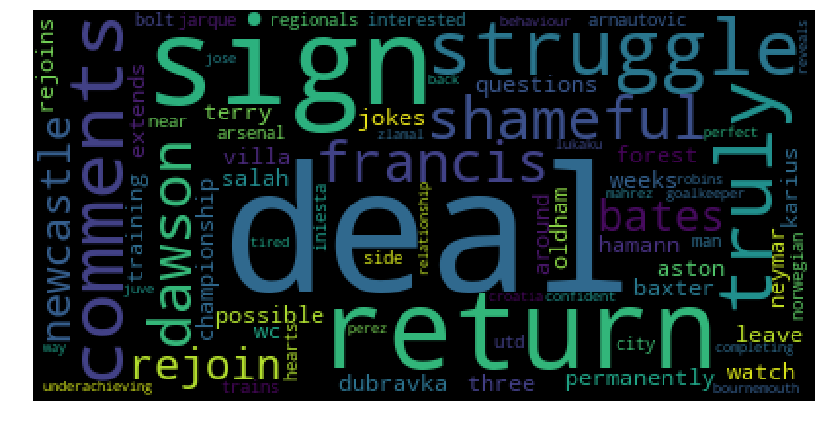

In [124]:
wordcloud.generate_from_frequencies(word_tfidf)
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [125]:
#Topic Modelling by Latent Dirichlet Allocation
from sklearn.decomposition import LatentDirichletAllocation

In [126]:
import numpy as np

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [128]:
import sklearn.feature_extraction.text as text

In [129]:
from sklearn.datasets import fetch_20newsgroups

In [130]:
#Getting the Document Term Matrix
vectorizer = text.CountVectorizer(input='content', stop_words='english', min_df=1)

In [131]:
dtm =  vectorizer.fit_transform(df['news-list__headline']).toarray()

In [132]:
dtm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [133]:
#Loading the Vocabulary
vocab = np.array(vectorizer.get_feature_names())

In [134]:
vocab[:20]

array(['arnautovic', 'arsenal', 'aston', 'bates', 'baxter', 'behaviour',
       'bolt', 'bournemouth', 'championship', 'city', 'comments',
       'completing', 'confident', 'croatia', 'dawson', 'deal', 'dubravka',
       'extends', 'forest', 'francis'],
      dtype='<U14')

In [135]:
headlines = df['news-list__headline']

In [136]:
model = LatentDirichletAllocation(n_topics=5, max_iter=500, random_state=1)

In [137]:
model.fit(dtm)

C:\Users\DELL\Anaconda3\anaconda\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\Users\DELL\Anaconda3\anaconda\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=500,
             mean_change_tol=0.001, n_components=10, n_jobs=1, n_topics=5,
             perp_tol=0.1, random_state=1, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [140]:
model.components_

array([[ 6.19996602,  0.20000774,  0.20000571,  0.20001031,  6.19995397,
         0.20000738,  0.20001019,  0.20000568,  6.19996562,  0.20000386,
         0.20001033,  0.20001033,  0.20001033,  0.20001409,  0.20001414,
         0.20001954,  0.20001034,  0.20000573,  0.2000141 ,  0.2000057 ,
         0.20000486,  0.2000074 ,  0.20000488,  0.20001032,  6.19996598,
         0.20001032,  6.19996598,  0.20000741,  0.20001036,  0.20000739,
         0.20000571,  0.20000741,  0.20000389,  6.199966  ,  0.2000039 ,
         0.20001034,  6.19996601,  0.20001019,  6.19995398,  0.20000772,
         0.2000074 ,  0.20001037,  6.1999656 ,  0.20000736,  0.20000389,
         0.20001413,  6.19995392,  0.20000739,  6.19997311,  0.20001034,
         6.19996559,  0.20000775,  0.20001033,  0.20001501,  0.20001033,
         0.20000572,  0.20001405,  6.19996601,  0.20001013,  0.20001034,
         0.20001408,  6.19996596,  0.20000569,  6.19996599,  0.20000776,
         0.2000077 ,  0.20000772,  0.20000485],
   

In [138]:
#Finding the key words that come together for each topic
n_top_words = 8

In [139]:
for i, topic_dist in enumerate(model.components_):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: return arnautovic training neymar man watch jokes
Topic 1: bates comments truly shameful reveals struggle jarque
Topic 2: deal leave aston terry villa francis extends
Topic 3: return lukaku perfect jose relationship questions hamann
Topic 4: deal sign mahrez near city regionals hearts


In [141]:
#Finding the topic for each document
for idx, topic in enumerate(model.components_):
    print ('Topic #%d:' % idx)
    print (' '.join ([vocab[i] for i in topic.argsort()[:-10 -1:-1]]))

Topic #0:
return arnautovic training neymar man watch jokes interested utd championship
Topic #1:
bates comments truly shameful reveals struggle jarque iniesta permanently newcastle
Topic #2:
deal leave aston terry villa francis extends bournemouth perez arsenal
Topic #3:
return lukaku perfect jose relationship questions hamann karius behaviour weeks
Topic #4:
deal sign mahrez near city regionals hearts goalkeeper zlamal return


In [142]:
doc_topic = model.components_

In [143]:
for n in range(5):
    topic_most_pr = model.components_[n].argmax()
    print("topic: {} , {}".format(topic_most_pr,headlines[n]))

topic: 48 ,                 Robins: Championship return possible            
topic: 3 ,                 Bates comments 'truly shameful'            
topic: 15 ,                 Dawson to rejoin Forest            
topic: 48 ,                 Newcastle sign Dubravka permanently            
topic: 15 ,                 Terry to leave Aston Villa            


In [144]:
#Performing Non Negative Matrix Factorization
from sklearn.decomposition import NMF

In [145]:
nmf = NMF(n_components = 20,
         random_state = 1,
         alpha = .1,
         l1_ratio = .5)

In [146]:
nmf.fit(dtm)

NMF(alpha=0.1, beta_loss='frobenius', init=None, l1_ratio=0.5, max_iter=200,
  n_components=20, random_state=1, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [147]:
 for idx, topic in enumerate(nmf.components_):
    print ('Topic #%d:' % idx)
    print (' '.join ([vocab[i] for i in topic.argsort()[:-10 -1:-1]]))

Topic #0:
deal francis bournemouth extends zlamal interested goalkeeper hamann hearts iniesta
Topic #1:
zlamal sign goalkeeper hearts iniesta forest francis hamann interested dubravka
Topic #2:
wc weeks salah return zlamal hearts extends forest francis goalkeeper
Topic #3:
karius hamann behaviour questions zlamal iniesta francis goalkeeper hearts jarque
Topic #4:
iniesta struggle jarque reveals hearts extends forest francis goalkeeper hamann
Topic #5:
bates shameful truly comments zlamal iniesta francis goalkeeper hamann hearts
Topic #6:
leave aston villa terry zlamal iniesta forest francis goalkeeper hamann
Topic #7:
lukaku jose relationship perfect juve karius jokes jarque extends interested
Topic #8:
watch neymar jokes training zlamal iniesta forest francis goalkeeper hamann
Topic #9:
man utd interested arnautovic watch villa karius juve jose jokes
Topic #10:
city near mahrez deal regionals zlamal goalkeeper hamann hearts iniesta
Topic #11:
croatia underachieving tired zlamal iniest

In [148]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd
import nltk
from nltk.corpus import stopwords
import gensim
from gensim import corpora, models

C:\Users\DELL\Anaconda3\anaconda\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [149]:
pattern = r'\b[^\d\W]+\b'
tokenizer = RegexpTokenizer(pattern)
stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [150]:
df = pd.read_csv('skysports.csv')

In [151]:
print(df['news-list__headline'].head(5))

0                    Robins: Championship return po...
1                    Bates comments 'truly shameful...
2                    Dawson to rejoin Forest       ...
3                    Newcastle sign Dubravka perman...
4                    Terry to leave Aston Villa    ...
Name: news-list__headline, dtype: object


In [152]:
texts = []
for i in df['news-list__headline'].iteritems():
    raw = str(i[1]).lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [raw for raw in tokens if not raw in stop]
    new_stopped_tokens = [raw for raw in stopped_tokens if not raw in stop]
    lemma_tokens = [lemmatizer.lemmatize(tokens) for tokens in new_stopped_tokens]
    new_lemma_tokens = [raw for raw in lemma_tokens if not len(raw) == 1]
    texts.append(new_lemma_tokens)
print(texts[0])

['robin', 'championship', 'return', 'possible']


In [153]:
print(texts[1])

['bates', 'comment', 'truly', 'shameful']


In [154]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [155]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=15, id2word = dictionary, passes=20)
import pprint
pprint.pprint(ldamodel.top_topics(corpus,topn=5))

[([(0.17429189, 'regionals'),
   (0.17429189, 'city'),
   (0.17429189, 'mahrez'),
   (0.17429189, 'near'),
   (0.17429188, 'deal')],
  1.8999912754044579e-11),
 ([(0.11489166, 'training'),
   (0.11489166, 'neymar'),
   (0.11489166, 'joke'),
   (0.11489166, 'watch'),
   (0.11489166, 'around')],
  1.8999912754044579e-11),
 ([(0.21057656, 'bates'),
   (0.21057656, 'truly'),
   (0.21057656, 'shameful'),
   (0.21057656, 'comment'),
   (0.002349281, 'jarque')],
  -9.8746328546934432),
 ([(0.21057014, 'side'),
   (0.21057014, 'norwegian'),
   (0.21057014, 'bolt'),
   (0.21057014, 'train'),
   (0.0023494039, 'question')],
  -9.8746328546934432),
 ([(0.21060778, 'interested'),
   (0.21060778, 'utd'),
   (0.21060778, 'man'),
   (0.21060778, 'arnautovic'),
   (0.0023325784, 'sign')],
  -9.8746328546934432),
 ([(0.21054444, 'villa'),
   (0.21054444, 'aston'),
   (0.21054444, 'leave'),
   (0.21054444, 'terry'),
   (0.0023665503, 'deal')],
  -9.8746328546934432),
 ([(0.10316308, 'way'),
   (0.103163